In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tabulate
from datetime import date


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("D:\\ds_c4_s3_concept-main\\Bcgx\\DS1_C5_S5_Hotel Dataset (1).csv")

In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


### Objective

The objective of the project is to analyze a hotel dataset to optimize various aspects of operations, boost revenue streams, and create a more efficient and satisfying experience for guests.

Extract actionable insights from the provided data, focusing on key areas such as booking patterns, customer behavioral segmentation, operational efficiency, and more.

### TASK-1 Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [6]:
data.shape

(2097, 32)

In [7]:
# Check missing Value

data.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [8]:
def info_col(data):
    categorical=data.select_dtypes(["object","category"]).columns.tolist()
    numerical=data.select_dtypes(["number"]).columns.tolist()
    return categorical,numerical

categorical,numerical=info_col(data)
table=[categorical,numerical]
print(tabulate.tabulate({"Categorical":categorical,
                         "Numerical":numerical},
                        headers=["Categorical","Numerical"]))

Categorical              Numerical
-----------------------  ------------------------------
hotel                    is_canceled
arrival_date_month       lead_time
meal                     arrival_date_year
country                  arrival_date_week_number
market_segment           arrival_date_day_of_month
distribution_channel     stays_in_weekend_nights
reserved_room_type       stays_in_week_nights
assigned_room_type       adults
deposit_type             children
customer_type            babies
reservation_status       is_repeated_guest
reservation_status_date  previous_cancellations
                         previous_bookings_not_canceled
                         booking_changes
                         agent
                         company
                         days_in_waiting_list
                         adr
                         required_car_parking_spaces
                         total_of_special_requests


In [9]:
# missing value treatment

mean=data["agent"].mean()
mean

74.78223350253808

In [10]:
data["agent"].fillna(mean,inplace=True)

In [11]:
mean1=data["company"].mean()
mean1

234.0

In [12]:
data["company"].fillna(mean1,inplace=True)

In [13]:
# convert date datatypes

In [14]:
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"],format="%d-%m-%Y")

### TASK-2

## Booking pattern Analysis

### PART-1   What are the peak booking periods for the hotel?

In [15]:
# Part-1
booking_cus=data[data["is_canceled"]==0]


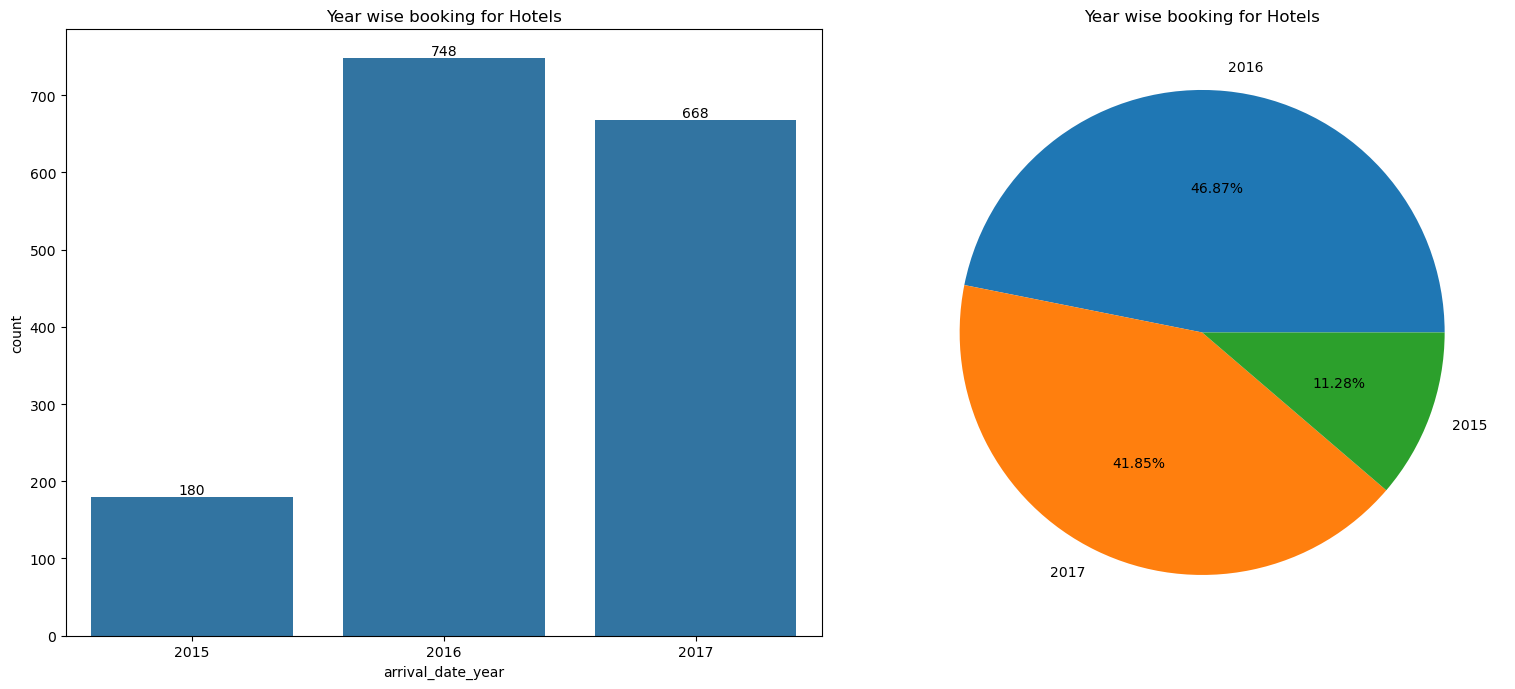

In [16]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
per=booking_cus["arrival_date_year"].value_counts()
sns.countplot(x=booking_cus["arrival_date_year"],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

plt.pie(per,labels=per.index,autopct="%0.2f%%")
ax[0].set_title("Year wise booking for Hotels")
ax[1].set_title("Year wise booking for Hotels")
plt.tight_layout()
plt.show()
        
         

Interpretation= 2016 is the year when customer actual booking is very high as per Bar graph - 748 and as per pie graph 46.87%

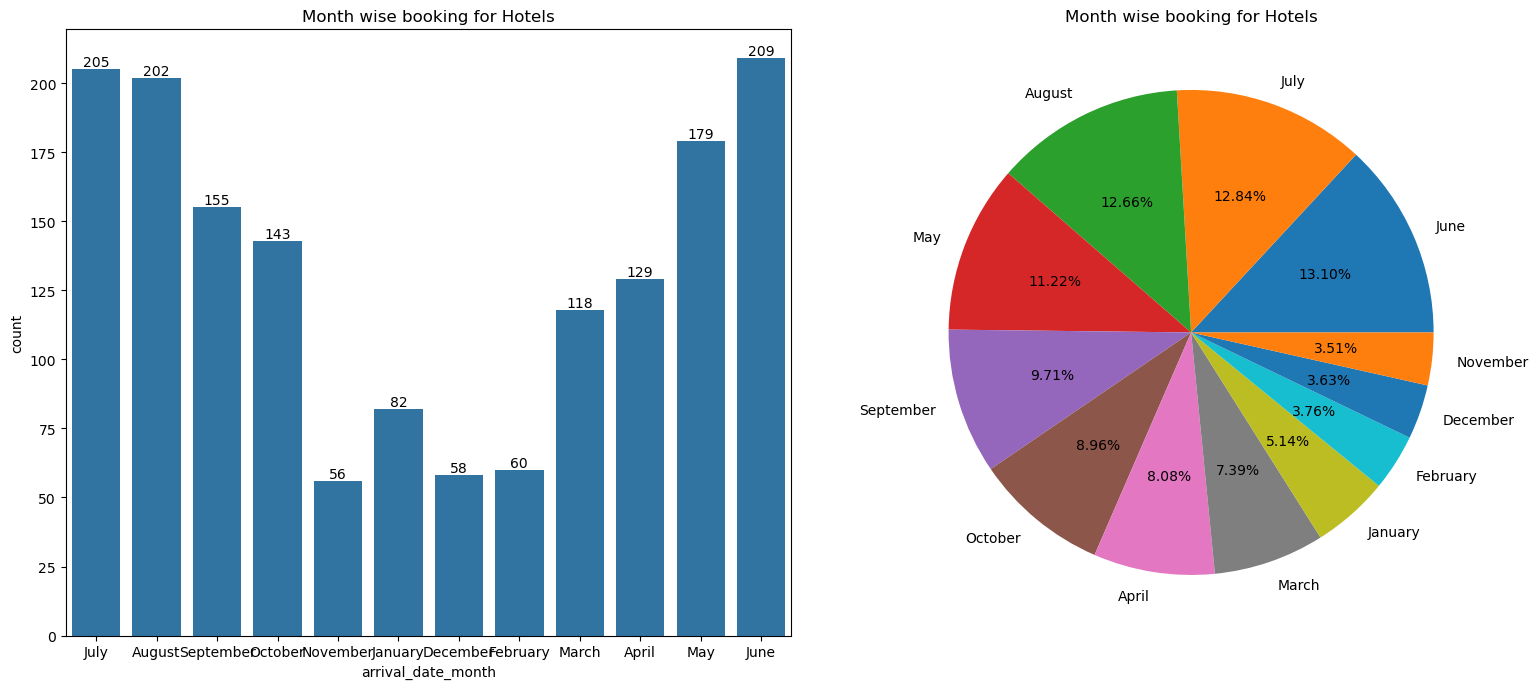

In [17]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
per=booking_cus["arrival_date_month"].value_counts()
sns.countplot(x=booking_cus["arrival_date_month"],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

plt.pie(per,labels=per.index,autopct="%0.2f%%")
ax[0].set_title("Month wise booking for Hotels")
ax[1].set_title("Month wise booking for Hotels")
plt.tight_layout()
plt.show()

Interpretaions= June is the month when customer booking is very high as per bar graph 209 customer booked as per pie graph 13.10% people are booked

### Part-2 Is there a relationship between lead time and the likelihood of a booking being cancelled?

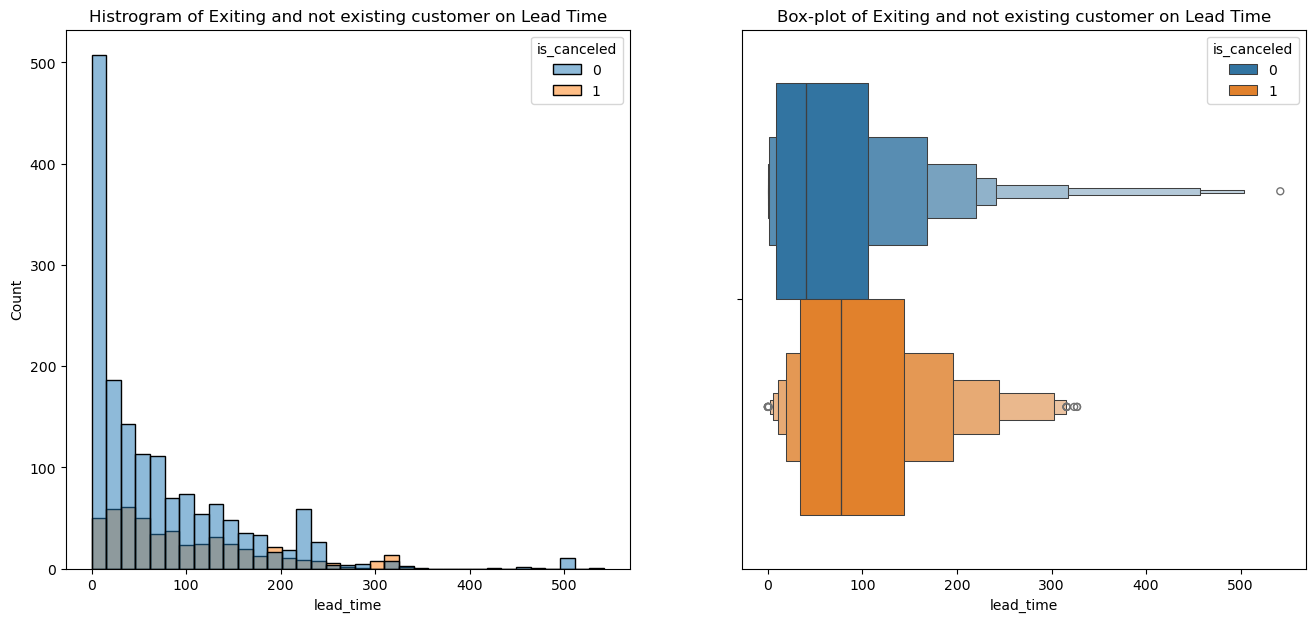

In [19]:
fig,ax=plt.subplots(1,2, figsize=(16,7))
sns.histplot(x="lead_time",hue="is_canceled",data=data,ax=ax[0])
sns.boxenplot(x="lead_time",hue="is_canceled",data=data,ax=ax[1])
ax[0].set_title("Histrogram of Exiting and not existing customer on Lead Time")
ax[1].set_title("Box-plot of Exiting and not existing customer on Lead Time")
plt.show()

Interpretations= Most of the customer cancel booking between 0 to 100.
                 Customers who book far in advance are more likely to cancel, possibly because their plans change over time.

### part-3 How do booking patterns vary by month, week, and day of the week?


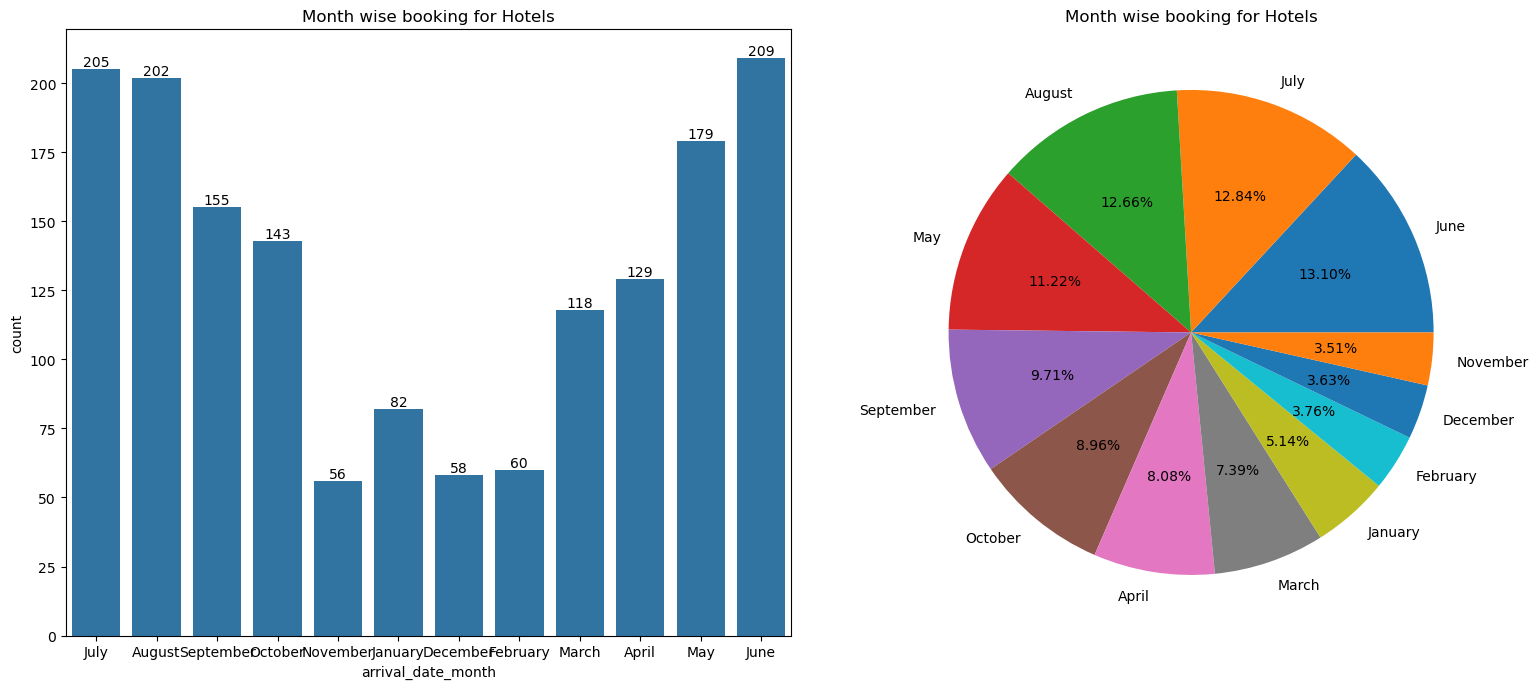

In [21]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
per=booking_cus["arrival_date_month"].value_counts()
sns.countplot(x=booking_cus["arrival_date_month"],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

plt.pie(per,labels=per.index,autopct="%0.2f%%")
ax[0].set_title("Month wise booking for Hotels")
ax[1].set_title("Month wise booking for Hotels")
plt.tight_layout()
plt.show()

Interpretaions= June is the month when customer booking is very high as per bar graph 209 customer booked as per pie graph 13.10% people are booked

In [22]:
data["day_of_week"]=data["reservation_status_date"].dt.day_name()

In [23]:
booking_cus1=data[data["is_canceled"]==0]


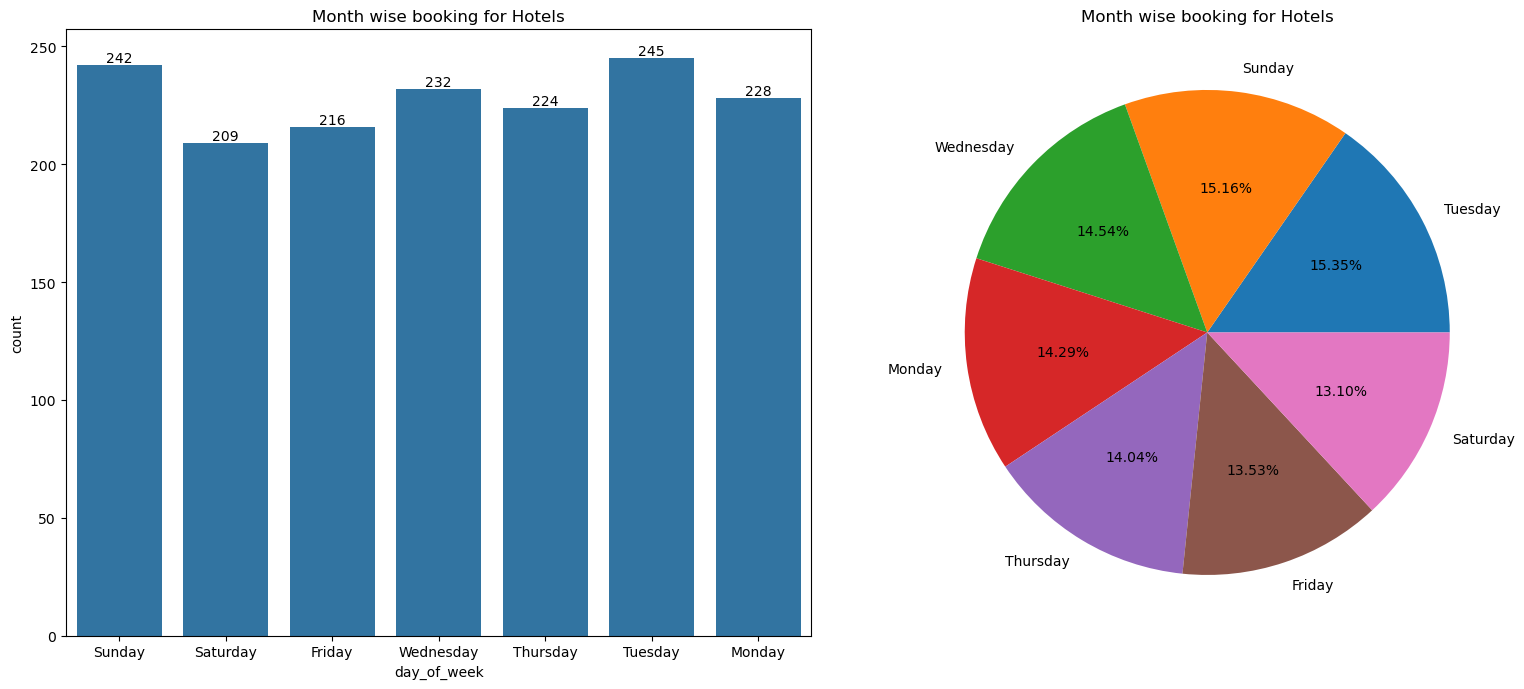

In [24]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
per=booking_cus1["day_of_week"].value_counts()
sns.countplot(x=booking_cus1["day_of_week"],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

plt.pie(per,labels=per.index,autopct="%0.2f%%")
ax[0].set_title("Month wise booking for Hotels")
ax[1].set_title("Month wise booking for Hotels")
plt.tight_layout()
plt.show()

Interpretations= all days booking are approx similar 

### TASK-3

### Booking Cancellation Analysis

### PART-1  What factors influence booking cancellations?


#### Market Segment column

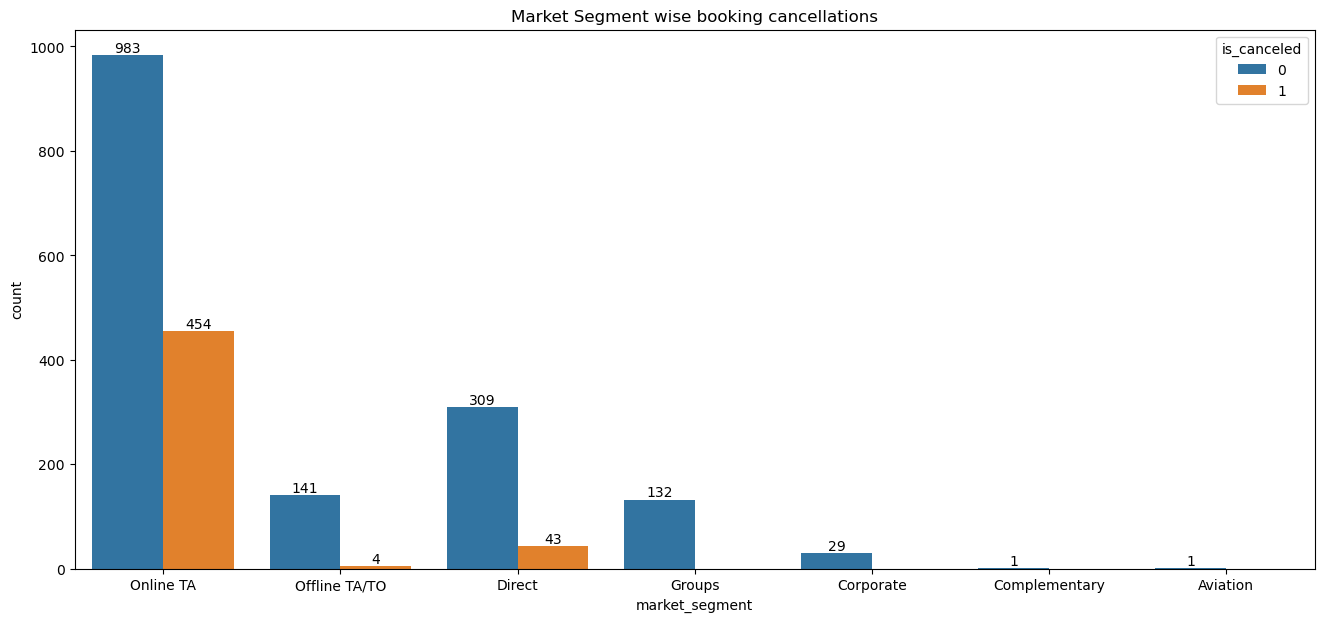

In [35]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="market_segment",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Market Segment wise booking cancellations")
plt.show()

Interpretations= From Online Travel Agent booking cancellations is very high instead of other factors

#### deposit type column

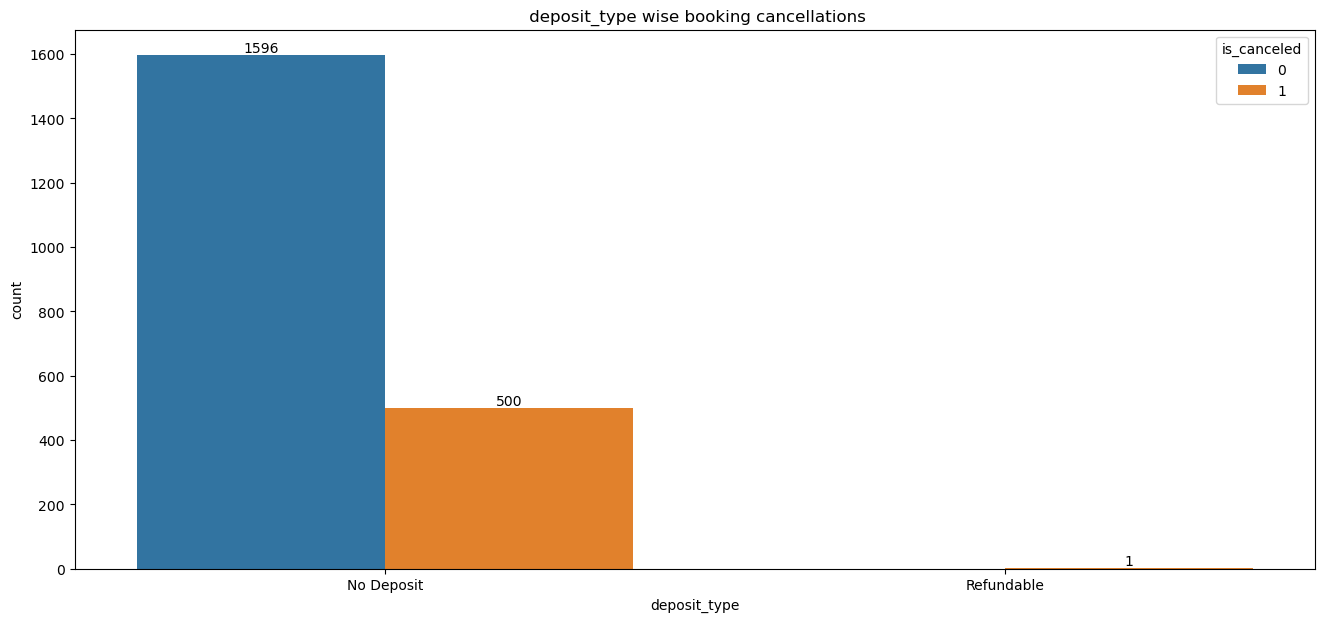

In [39]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="deposit_type",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title(" deposit_type wise booking cancellations")
plt.show()

Reason: Bookings with no deposit are more likely to be canceled since the guest has no financial commitment.

#### repeated_guest column

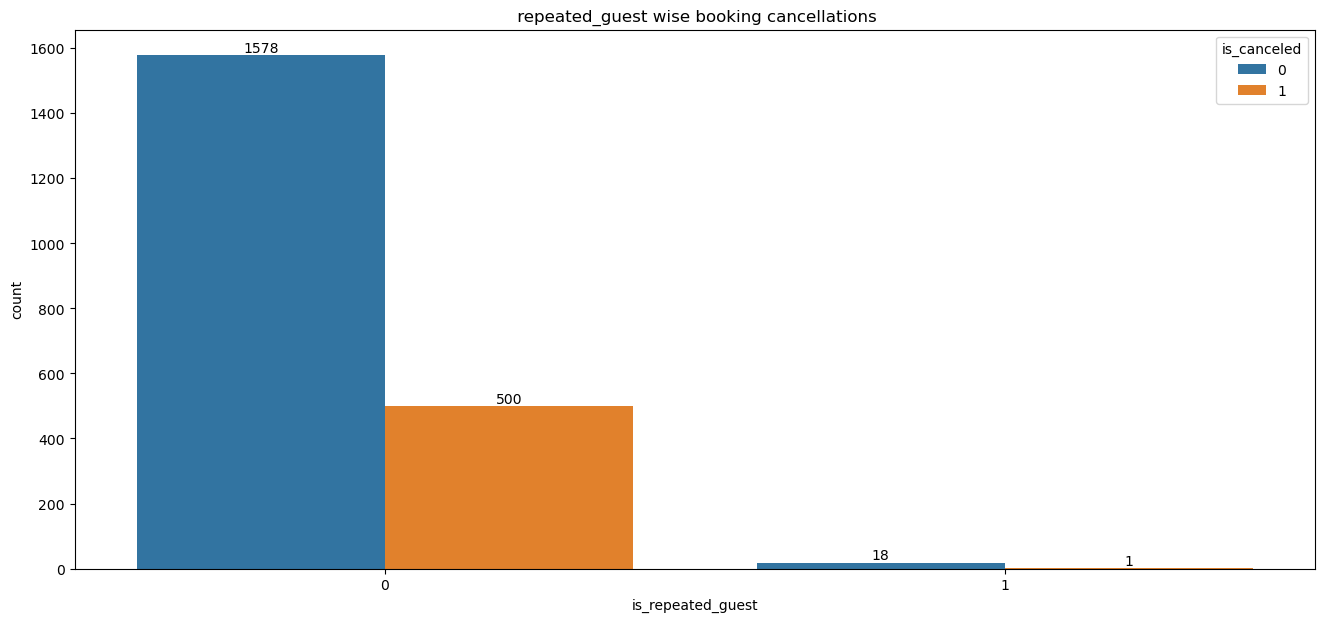

In [43]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="is_repeated_guest",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title(" repeated_guest wise booking cancellations")
plt.show()

 Interpretaions = New customer are cancel booking more instead of repating customer
                   Repeated guests are typically more reliable and less likely to cancel.

# Average Daily Rate column

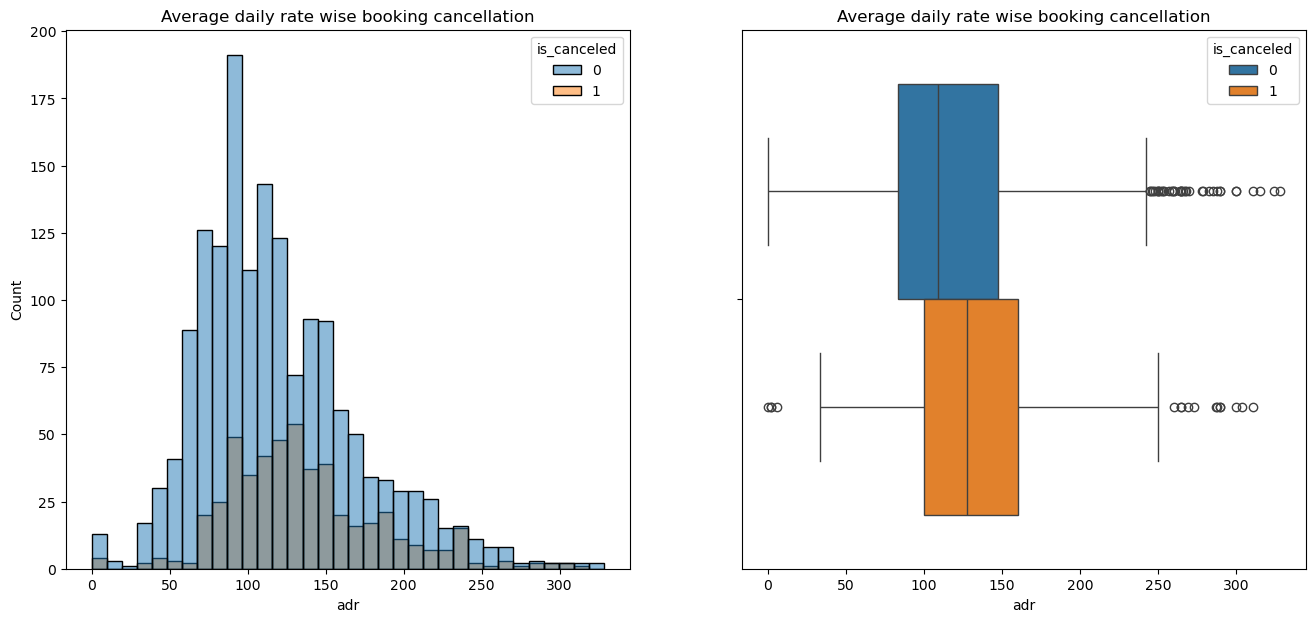

In [46]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.histplot(x="adr",hue="is_canceled",data=data,ax=ax[0])
sns.boxplot(x="adr",hue="is_canceled",data=data,ax=ax[1])
ax[0].set_title("Average daily rate wise booking cancellation")
ax[1].set_title("Average daily rate wise booking cancellation")

plt.show()

Interpretaions= While cancellations occur across all ADR ranges, they tend to spike more among bookings with very high or very low ADRs, which could indicate either price-sensitive or high-risk bookings.

### part-2  Are there specific trends or patterns in cancellations over time?

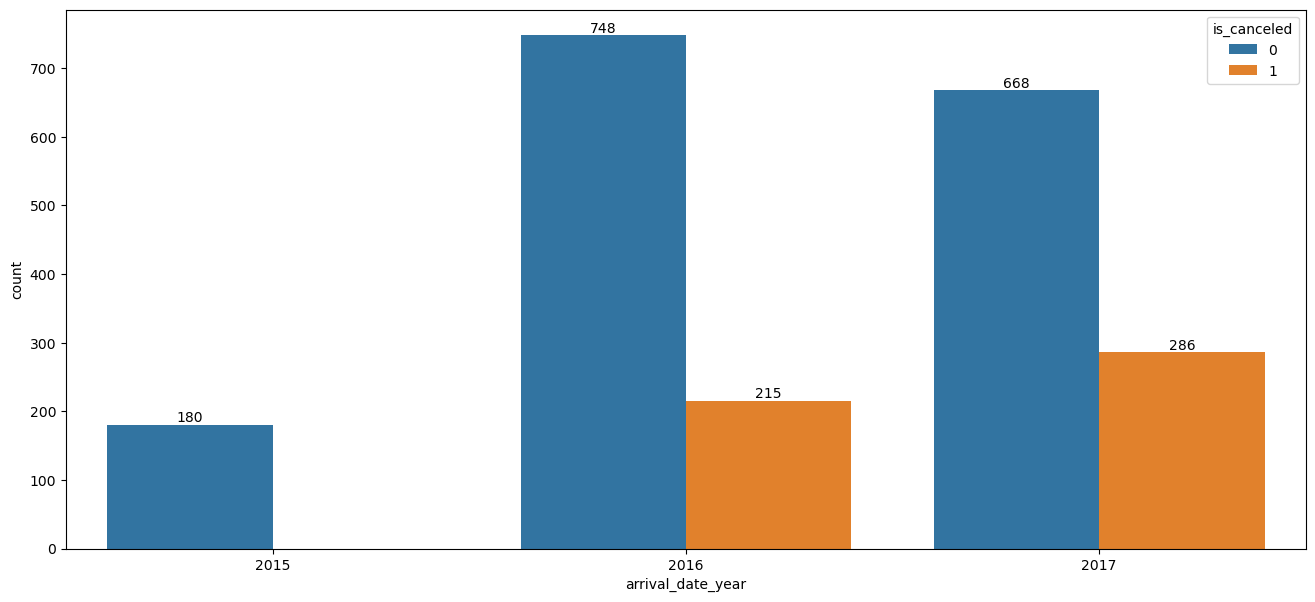

In [51]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="arrival_date_year",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)

Total bookings decreased in 2017 compared to 2016 beacuse of high cancellation by customer

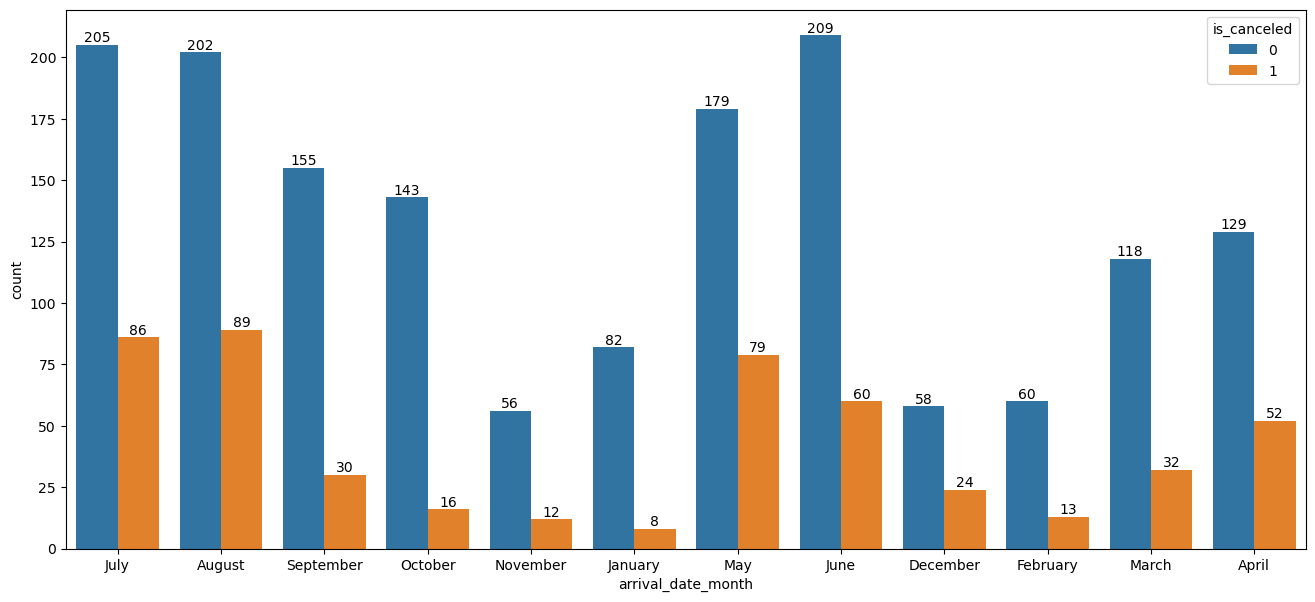

In [52]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="arrival_date_month",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)

Month from april to August  is a part where booking done by customer very high and cancellation also very high

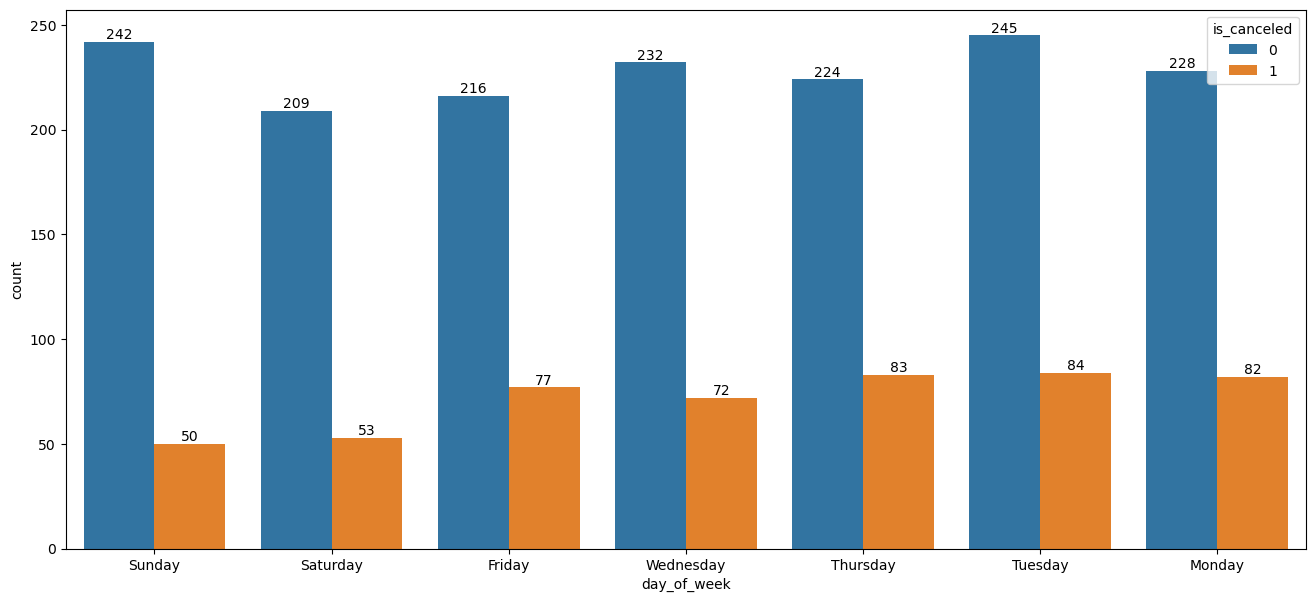

In [53]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="day_of_week",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)

Weekends (Saturday & Sunday):

  Have lower cancellation counts compared to weekdays.



Weekdays (Monday to Friday):

Higher cancellation counts, especially Tuesday to Friday (72–84).

Total bookings remain similar, but a higher proportion is canceled

Cancellation trends vary by day of week, with weekday bookings more likely to be canceled.



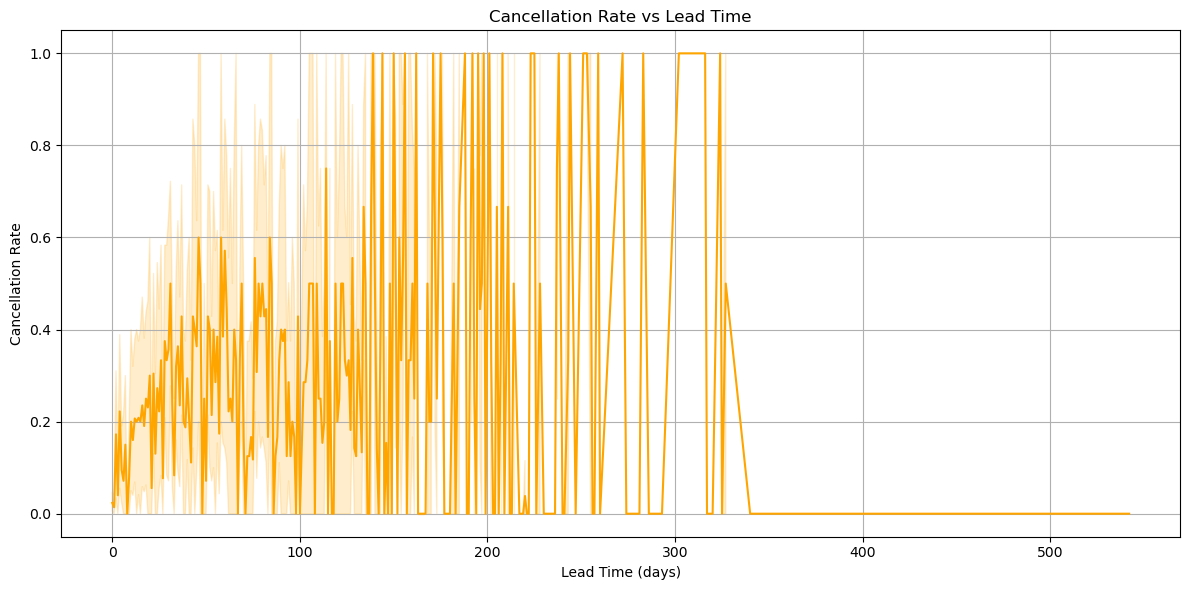

In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='lead_time', y='is_canceled', color='orange')
plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

longer lead times are associated with higher cancellation rates.

### PART-3   Can we identify high-risk bookings that are more likely to be canceled?

Yes, we can identify high-risk bookings that are more likely to be canceled by analyzing patterns in the data. Based on your dataset and the visuals you've provided, here are some key indicators of high-risk bookings:



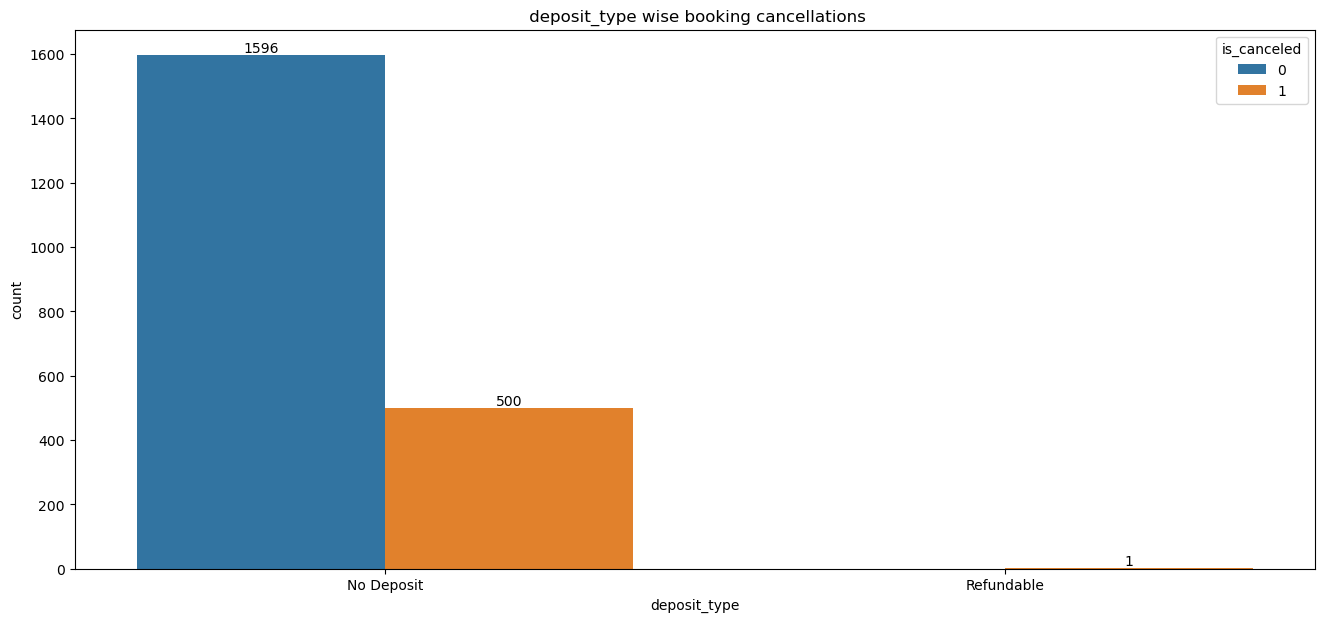

In [56]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="deposit_type",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title(" deposit_type wise booking cancellations")
plt.show()

Bookings with ‘No Deposit’ are more likely to be canceled, since customers have nothing to lose.

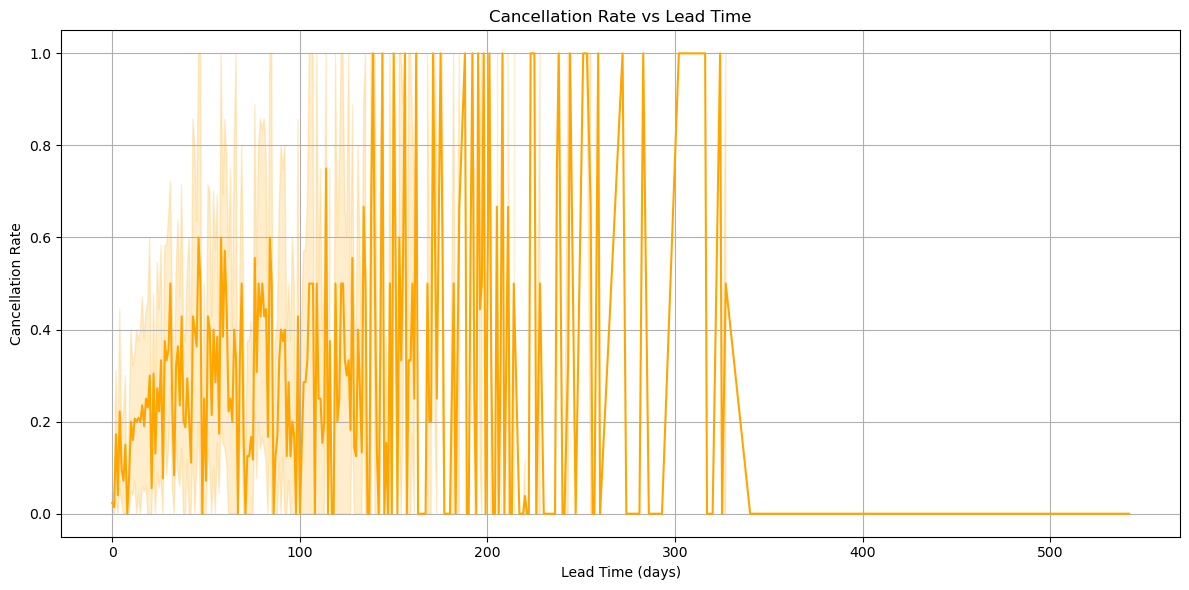

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='lead_time', y='is_canceled', color='orange')
plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Long lead times (many days between booking and arrival) often correlate with higher cancellation rates.

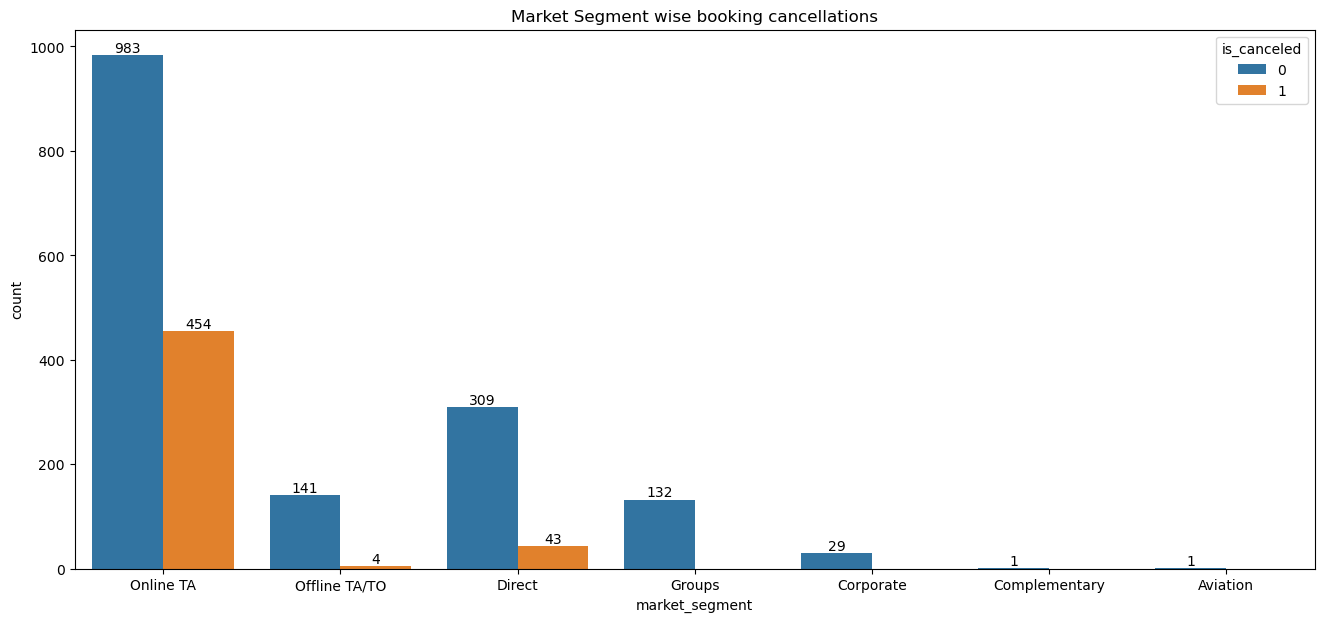

In [63]:
fig,ax=plt.subplots(figsize=(16,7))
ax=sns.countplot(x="market_segment",hue="is_canceled",data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Market Segment wise booking cancellations")
plt.show()

Repeated guests tend to cancel less.

 Bookings from "Online Travel Agents" high cancellation rates.

### TASK-4

#### Customer Behavioral Segmentation

### PART-1 Are there distinct patterns in the lead time, special requests, or room preferences for different customer segments?

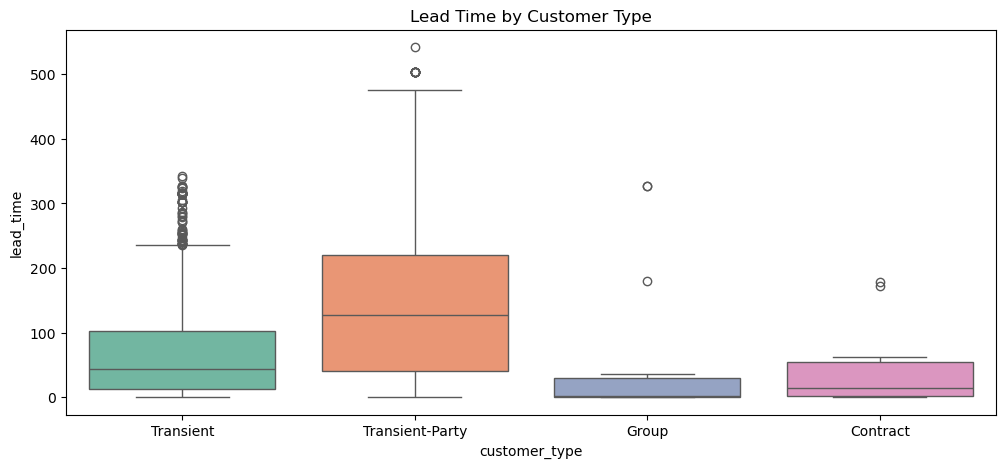

In [76]:
# Plot 1: Lead time vs customer type
plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='customer_type', y='lead_time', palette='Set2')
plt.title('Lead Time by Customer Type')
plt.show()

Transient-Party bookings have the longest lead times: This segment requires the most advance planning, likely due to the nature of group travel or package deals.

Group bookings have the shortest lead times: Group travel arrangements tend to be finalized closer to the arrival date.

Transient customers show a wide range of booking behaviors: While many book closer to their stay, a significant number plan well in advance.

Contract bookings generally have short lead times but can vary: These might be influenced by the specifics of the contract agreement.

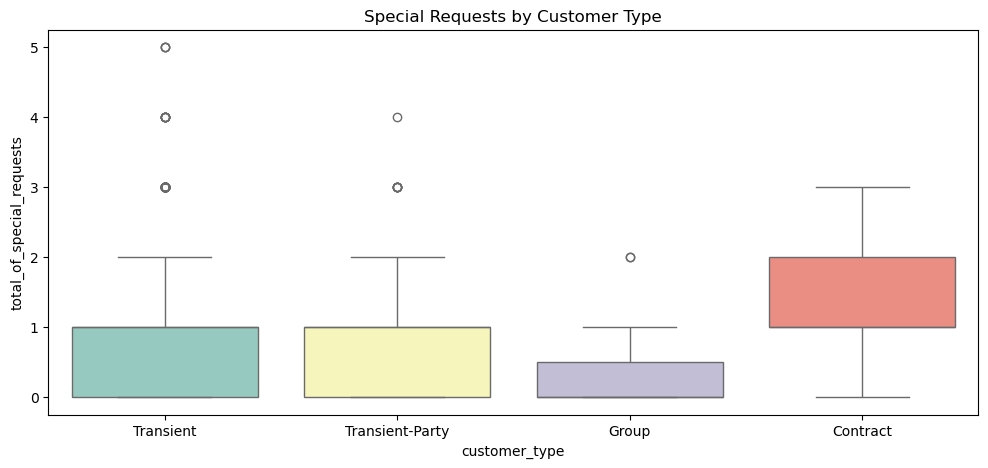

In [78]:
# Plot 2: Special Requests vs customer type
plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='customer_type', y='total_of_special_requests', palette='Set3')
plt.title('Special Requests by Customer Type')
plt.show()


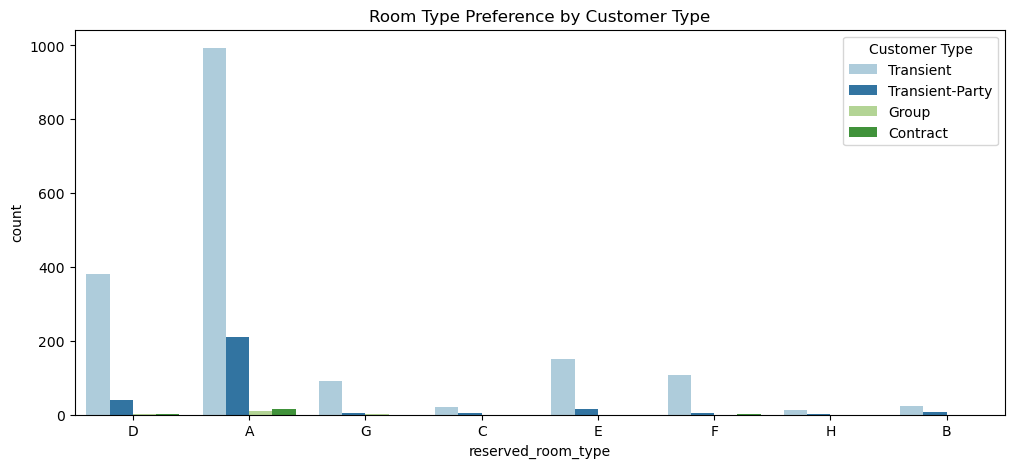

In [80]:
# Plot 3: Room preference by customer type (count plot)
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='reserved_room_type', hue='customer_type', palette='Paired')
plt.title('Room Type Preference by Customer Type')
plt.legend(title='Customer Type')
plt.show()

### Part-2 Which marketing channels are the most effective for reaching specific customer segments?

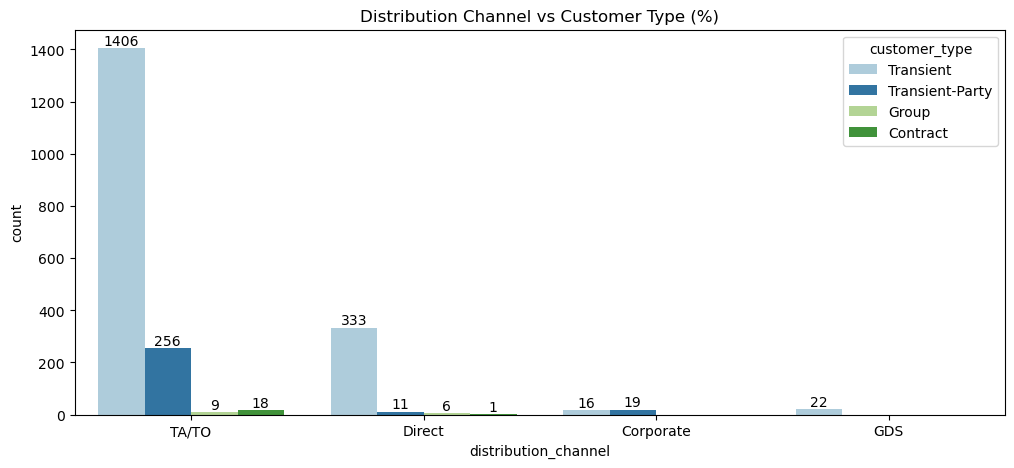

In [87]:
plt.figure(figsize=(12, 5))
ax=sns.countplot(data=data, x="distribution_channel", hue='customer_type', palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution Channel vs Customer Type (%)')
plt.show()

Interpretations= Transient  customer Type are very high with TA/TO distribution channel-1406.

                 

Transient-party  customer Type are very high with TA/TO distribution channel-256.
                

Group  customer Type are very high with TA/TO distribution channel-9.


contract  customer Type are very high with TA/TO distribution channel-18.

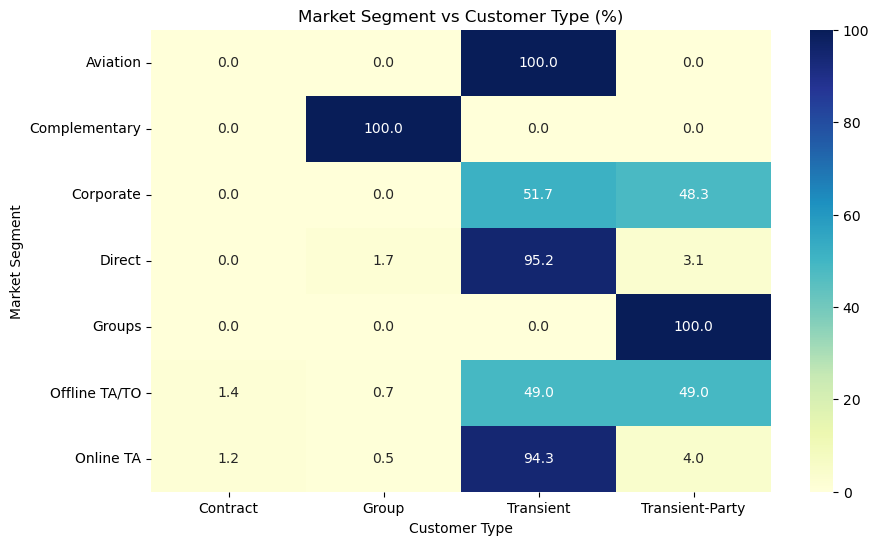

In [88]:
# Create a crosstab (counts) of customer_type vs market_segment
market_vs_customer = pd.crosstab(data['market_segment'], data['customer_type'], normalize='index') * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(market_vs_customer, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Market Segment vs Customer Type (%)')
plt.ylabel('Market Segment')
plt.xlabel('Customer Type')
plt.show()


According to Market Segment also Transient customer type is very high with Aviation market segment & Online TA & Direct 

for Group customer Type Complementary is a best market segment

According to Market Segment also Transient-party customer type is also very high after transient customer with   Groups market segment & Online TA/TO 

# Part-3 How can marketing strategies be customized to resonate with specific customer segments, considering factors such as previous cancellations, booking lead time, and special requests?

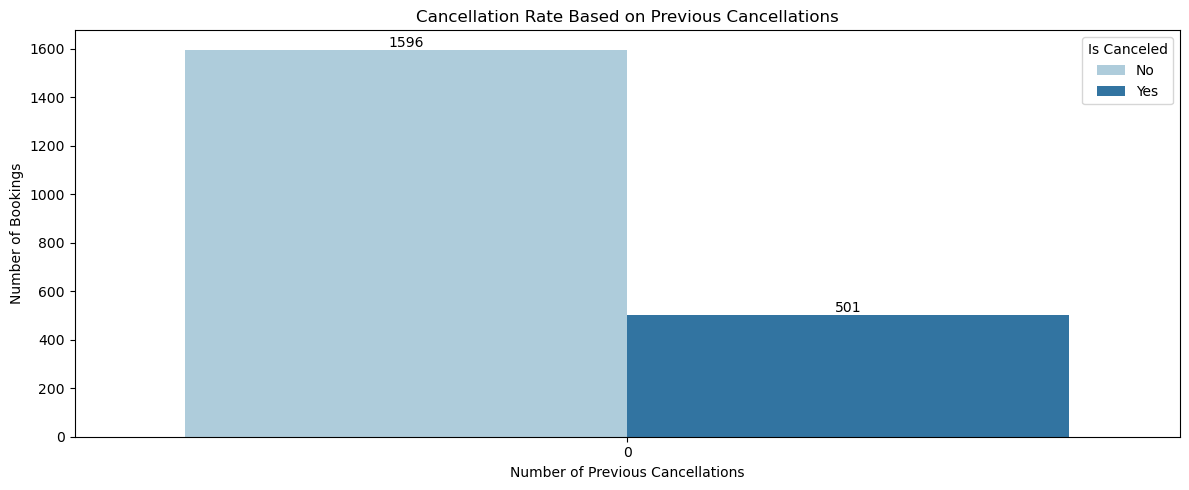

In [94]:
plt.figure(figsize=(12, 5))
ax=sns.countplot(data=data, x="previous_cancellations", hue='is_canceled', palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cancellation Rate Based on Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Insight: Customers with no previous cancellations are far more likely to complete bookings.

Strategy: - Target with retention offers: Prioritize loyal customers with no cancellation history using loyalty rewards, discounts, or exclusive offers.



Flag high-risk customers: Customers with prior cancellations can be offered flexible booking terms or be nudged with reminders or incentives to reduce the risk of repeat cancellations.

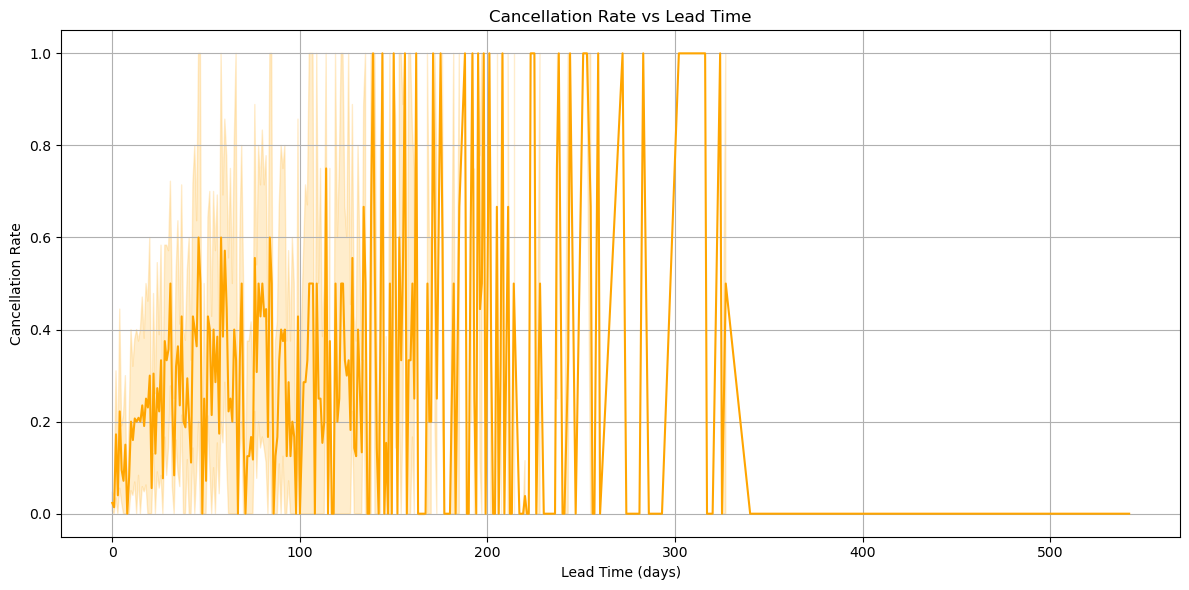

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='lead_time', y='is_canceled', color='orange')
plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight: Higher lead times (especially beyond 100 days) show a much more erratic and often higher cancellation rate.

Strategy:- 1. Short-lead promotions: Offer last-minute deals and emphasize “book now, cancel anytime” only for short lead times to drive conversions with lower risk.

Deposit or commitment incentives: For long-lead bookings, provide early-bird discounts paired with partial non-refundable deposits or cancellation insurance options.

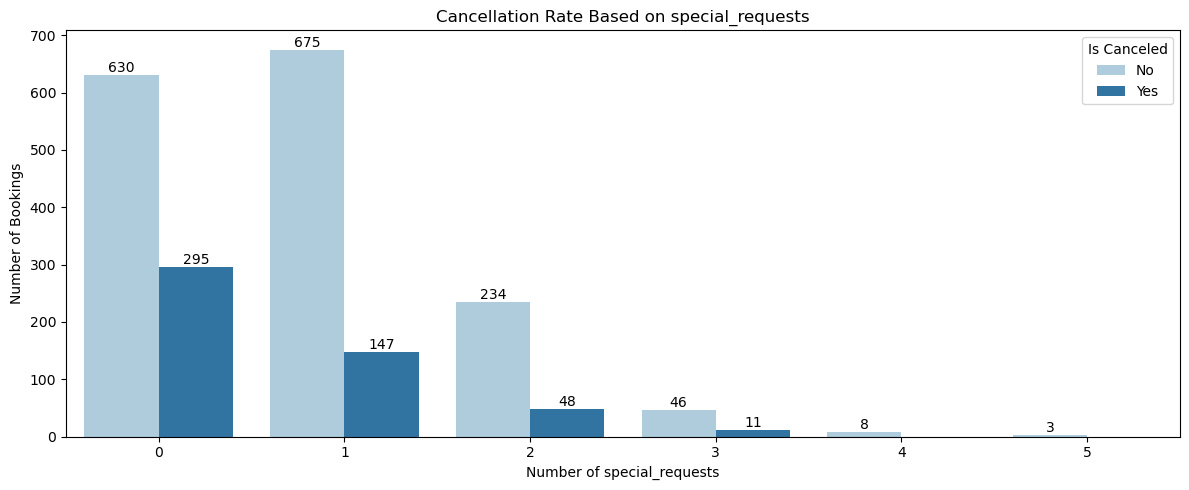

In [98]:
plt.figure(figsize=(12, 5))
ax=sns.countplot(data=data, x="total_of_special_requests", hue='is_canceled', palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cancellation Rate Based on special_requests')
plt.xlabel('Number of special_requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Insight: Bookings with more special requests tend to be less likely to cancel.



Strategy: 1. Promote personalization: Encourage guests to customize their stay (e.g., room preferences, special services). More engaged customers seem more committed.



Upselling opportunity: Use request data to upsell premium services or packages.



### TASK-5 How does the Average Daily Rate (ADR) vary over time?

# Revenue Management

### PART-1

In [109]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + 
                                     data['arrival_date_month'] + '-' + 
                                     data['arrival_date_day_of_month'].astype(str))


In [110]:
adr_over_time = data.groupby(data['arrival_date'].dt.to_period('M'))['adr'].mean()


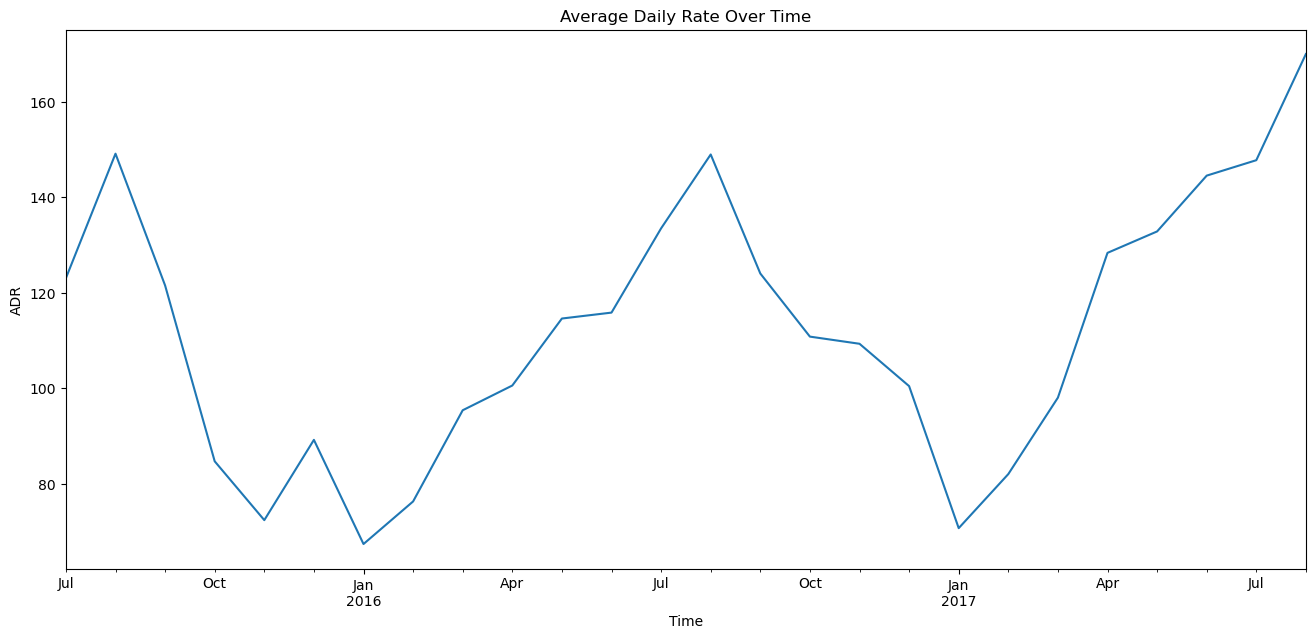

In [112]:
fig,ax=plt.subplots(figsize=(16,7))
adr_over_time.plot(kind='line', title='Average Daily Rate Over Time')
plt.ylabel('ADR')
plt.xlabel('Time')
plt.show()

Year-on-year changes

Seasonal Fluctuations: The most prominent feature of the graph is the clear seasonal pattern in ADR. We can observe peaks and troughs that generally repeat annually, suggesting that the ADR is influenced by the time of year.

Mid-Year Peaks: There appear to be peaks in ADR around the middle of the year, specifically around July/August in both 2015 and 2016. This could be attributed to factors such as summer holidays, tourist season, or local events that drive higher demand for accommodation.

Mid-Year Peaks: There appear to be peaks in ADR around the middle of the year, specifically around July/August in both 2015 and 2016. This could be attributed to factors such as summer holidays, tourist season, or local events that drive higher demand for accommodation.

## Part-2 Can we identify pricing strategies that maximize revenue?

In [115]:
no_cancel_booking=data[data["is_canceled"]==0]

In [116]:
no_cancel_booking['revenue'] = no_cancel_booking['adr'] * (no_cancel_booking['stays_in_week_nights'] + no_cancel_booking['stays_in_weekend_nights'])


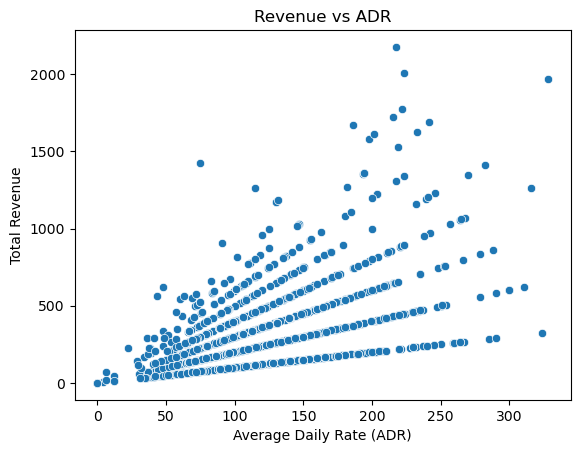

In [119]:
sns.scatterplot(x='adr', y='revenue', data=no_cancel_booking)
plt.title("Revenue vs ADR")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Total Revenue")
plt.show()

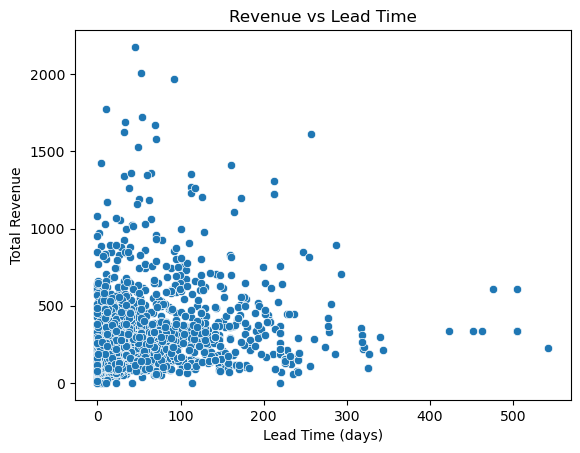

In [123]:


sns.scatterplot(x='lead_time', y='revenue', data=no_cancel_booking)
plt.title("Revenue vs Lead Time")  # Fixed the title
plt.xlabel("Lead Time (days)")
plt.ylabel("Total Revenue")
plt.show()


revenue decreases with higher lead time, it may indicate last-minute bookings are more profitable.



## PART-3  Are there specific room types associated with higher ADR?

In [130]:
room_adr = data.groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)
print(room_adr)


assigned_room_type
H    215.380000
G    190.114196
F    166.891329
I    157.834286
E    148.010113
C    146.905000
D    128.033448
B    105.685185
A    102.765482
K     62.771429
Name: adr, dtype: float64


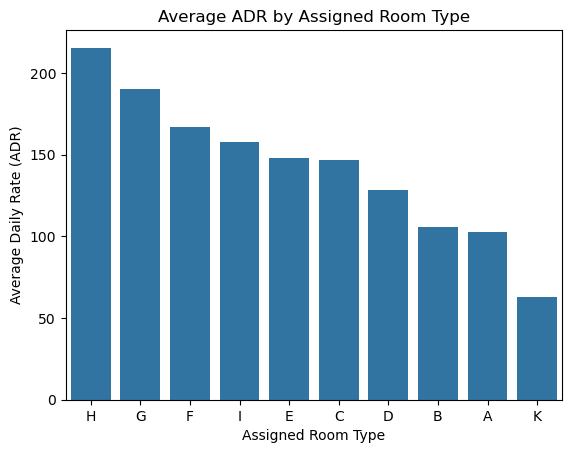

In [131]:
sns.barplot(x=room_adr.index, y=room_adr.values)
plt.title("Average ADR by Assigned Room Type")
plt.xlabel("Assigned Room Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

Premium room types with higher ADRs like H room type G room type F roomtype



## TASK-6

###  Operational Efficiency

#### PART-1  What is the effectiveness of different booking distribution channels?

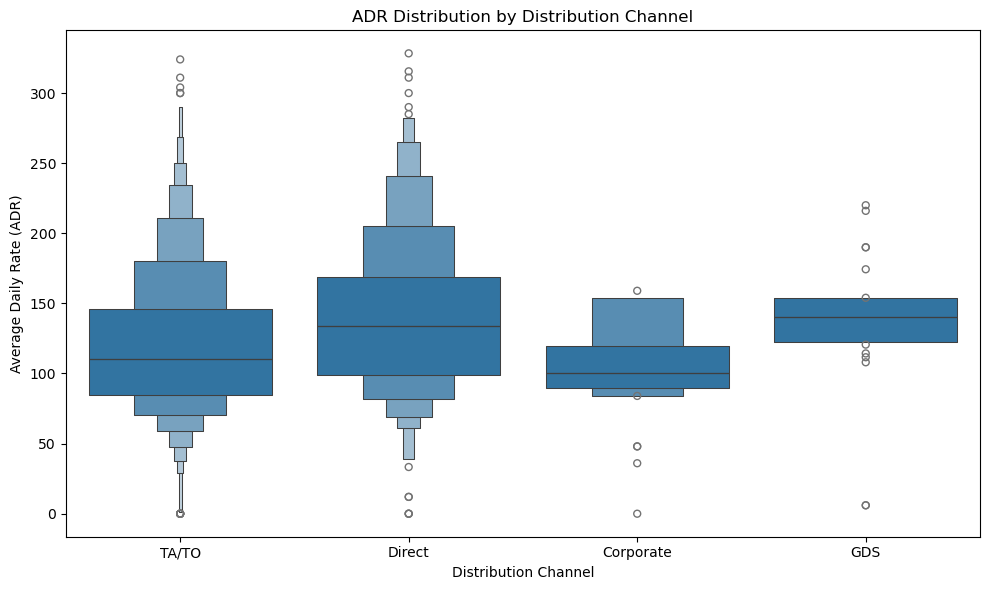

In [140]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='distribution_channel', y='adr', data=data)
plt.title("ADR Distribution by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Average Daily Rate (ADR)")
plt.tight_layout()
plt.show()

Maximize ADR: Focus on GDS and Direct channels.

High-volume, variable ADR: TA/TO channel is broad but less predictable.

Stable, lower ADR: Corporate channel provides consistency, not high pricing.

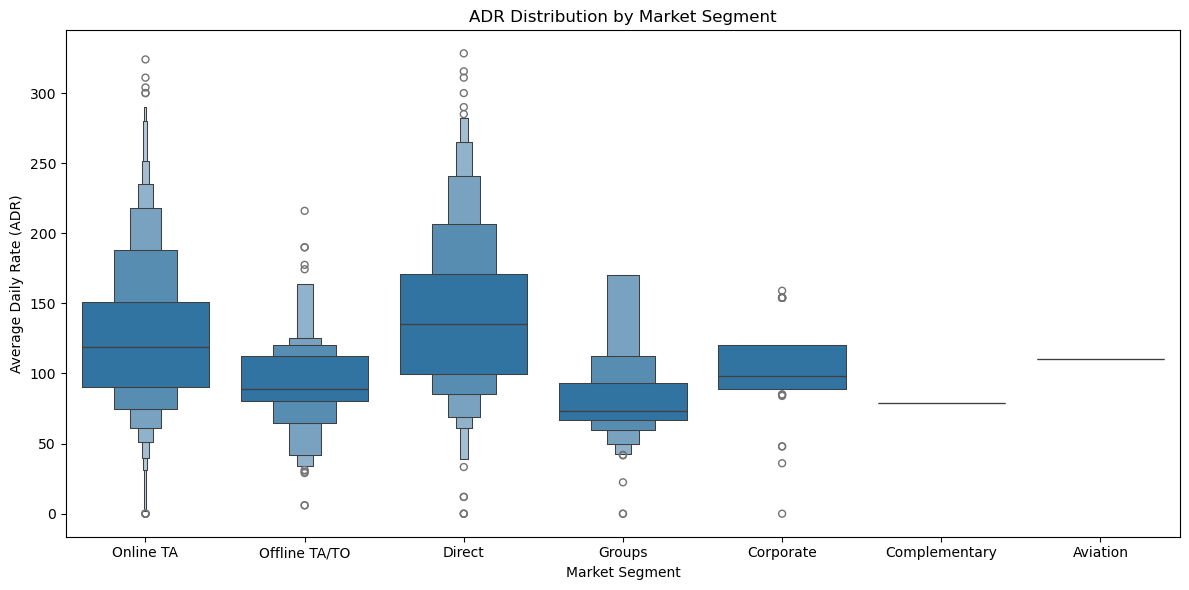

In [139]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='market_segment', y='adr', data=data)
plt.title("ADR Distribution by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Daily Rate (ADR)")
plt.tight_layout()
plt.show()

Online TA and Direct bookings tend to have higher ADRs and a wider range: These channels seem to attract bookings with both higher average rates and more variability in pricing, potentially reflecting a mix of different room types, packages, and demand elasticity.

Offline TA/TO and Groups generally have lower ADRs: These segments might represent negotiated rates or bulk bookings, leading to lower average prices.

Corporate bookings show a more consistent and moderate ADR: This could indicate pre-negotiated corporate rates that fall within a specific range.

### PART-2 How do booking changes impact hotel operations?

In [143]:
data["booking_changes"].unique()

array([ 0,  1,  2,  3,  5,  4,  6, 14,  8, 11], dtype=int64)

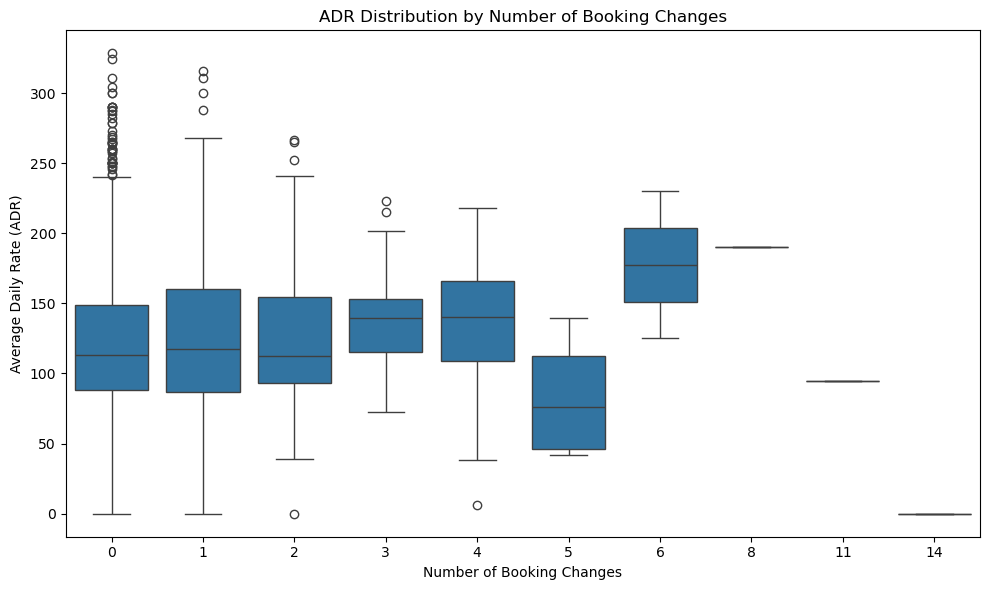

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="booking_changes", y="adr", data=data)
plt.title("ADR Distribution by Number of Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Average Daily Rate (ADR)")
plt.tight_layout()
plt.show()

Revenue Management -	Frequent changes complicate forecasting and pricing strategies.

Inventory Management -	Room availability becomes less predictable, increasing overbooking or underutilization risk.

Staff Workload -	Manual interventions (e.g., updating reservations, coordinating with guests) increase.

Guest Experience -	Repeated changes may signal uncertainty; can affect service delivery and expectations.

### PART-3 s there a correlation between the duration a booking remains on the waiting list and the likelihood of cancellation?

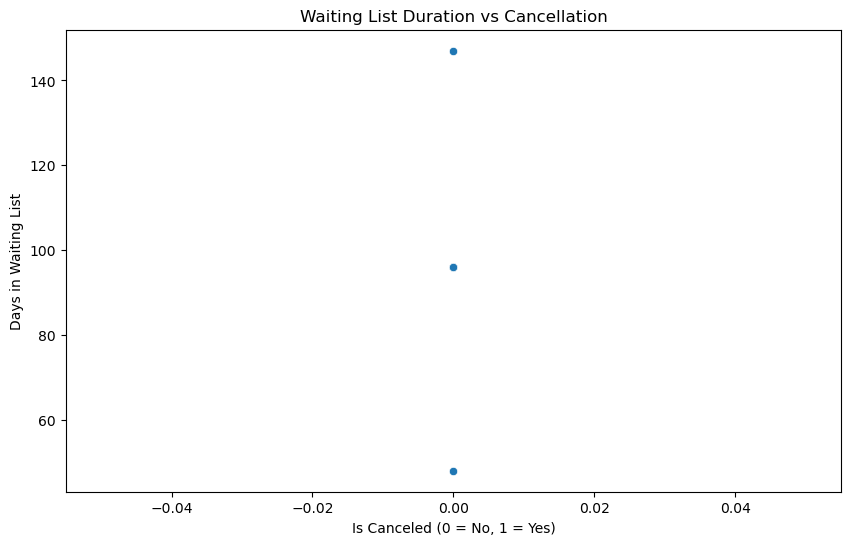

In [159]:
waiting_data = data[data['days_in_waiting_list'] > 0]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='is_canceled', y='days_in_waiting_list', data=waiting_data)
plt.title("Waiting List Duration vs Cancellation")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Days in Waiting List")
plt.show()

Interpretations- If customer is on waiting period there is no chance to cancel by customer based on data

No cancellation for bookings on the waiting list: The most striking observation is that all the bookings that spent time on the waiting list (for varying durations) in this specific subset of data ultimately were not canceled.

Waiting list duration varies: Even though none of these bookings were canceled, the time spent on the waiting list varied significantly, ranging from around 48 to 148 days.

### TASK-7

### Loyalty programs and repeat business 

#### PART-1 What is the behavior of repeated guests with respect to their nature of stay?

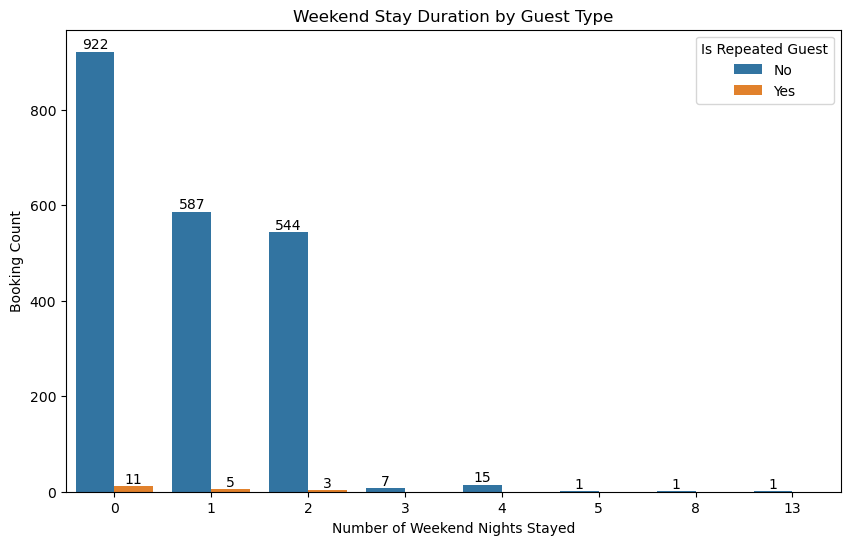

In [167]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="stays_in_weekend_nights", hue="is_repeated_guest", data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Weekend Stay Duration by Guest Type")
plt.xlabel("Number of Weekend Nights Stayed")
plt.ylabel("Booking Count")
plt.legend(title="Is Repeated Guest", labels=["No", "Yes"])
plt.show()


Most guests stay 0 to 2 weekend nights, with the majority staying 0 nights, followed by 1 and 2 nights.



Repeated guests (orange bars) are a very small minority across all weekend stay durations.

Non-repeated guests (blue bars) dominate every stay duration category.



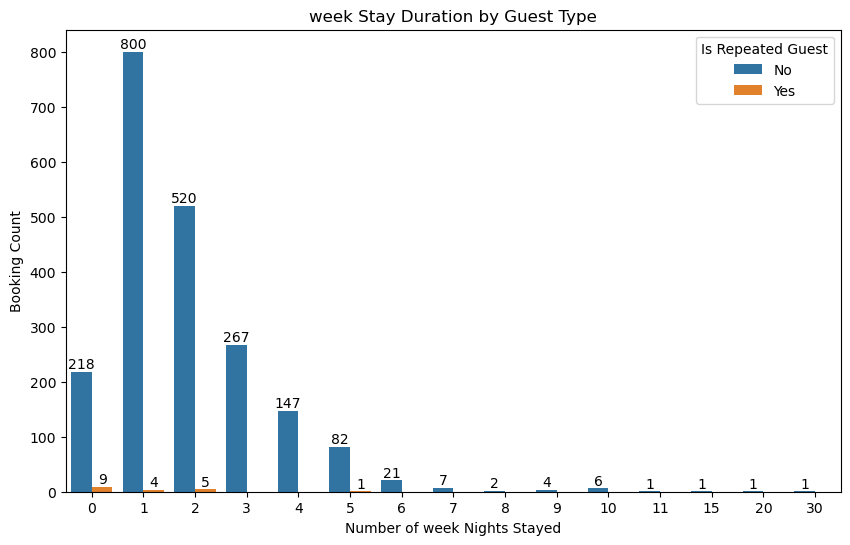

In [168]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="stays_in_week_nights", hue="is_repeated_guest", data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.title("week Stay Duration by Guest Type")
plt.xlabel("Number of week Nights Stayed")
plt.ylabel("Booking Count")
plt.legend(title="Is Repeated Guest", labels=["No", "Yes"])
plt.show()

The majority of bookings are for 1–2 weekday nights, with 1-night stays peaking at 800 bookings.

Booking count drops sharply beyond 3 nights.



Repeated guests (orange bars) are again a small minority, visible only in the lowest duration categories (0–2 nights).



Very few guests stay for extended durations (10+ nights).



### PART-2 How does the success of loyalty programs relate to the accommodation of special requests from customers?

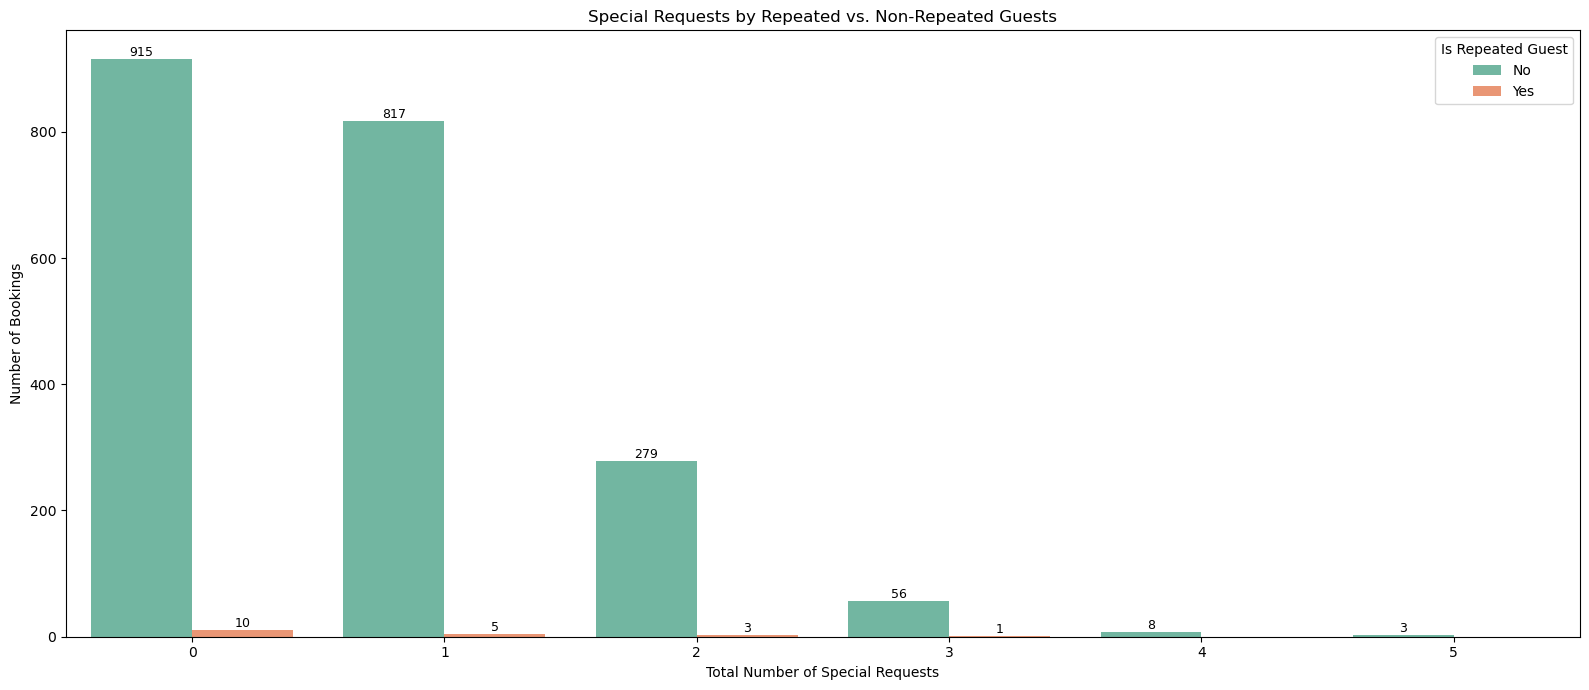

In [180]:
plt.figure(figsize=(16, 7))

# Create the countplot
ax = sns.countplot(x="total_of_special_requests", hue="is_repeated_guest", data=data, palette="Set2")

# Add plot title and axis labels
plt.title("Special Requests by Repeated vs. Non-Repeated Guests")
plt.xlabel("Total Number of Special Requests")
plt.ylabel("Number of Bookings")

# Add count annotations on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Display the legend and plot
plt.legend(title="Is Repeated Guest", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Most guests make few or no special requests: Regardless of whether they are repeat guests or not, the vast majority of bookings involve either zero or just one special request.

Non-repeat guests are less likely to make special requests: The significantly higher number of non-repeat guest bookings with 0 or 1 special request compared to repeat guests suggests that new guests are less inclined to specify particular needs or preferences during their initial booking.

High numbers of special requests are rare: Bookings with a high number of special requests (4 or 5) are very uncommon for both new and returning guests in this dataset.

### PART-3  What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

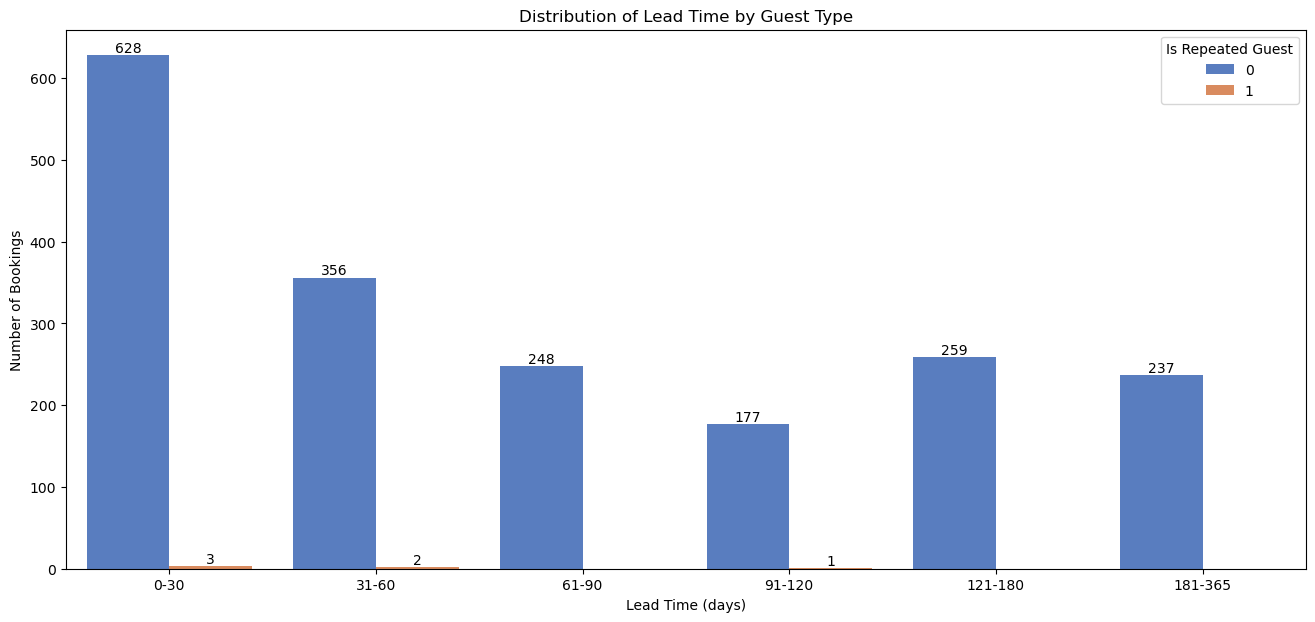

In [179]:
# Create lead time bins
data['lead_time_bin'] = pd.cut(data['lead_time'], bins=[0, 30, 60, 90, 120, 180, 365], 
                                labels=['0-30', '31-60', '61-90', '91-120', '121-180', '181-365'])

# Plot count of guests per lead time bin
plt.figure(figsize=(16,7))
ax=sns.countplot(x="lead_time_bin", hue="is_repeated_guest", data=data, palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribution of Lead Time by Guest Type")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.legend(title="Is Repeated Guest")
plt.show()


Shorter lead times are more common: Overall, most bookings, regardless of whether the guest is a repeat customer or not, tend to have shorter lead times (within the first 60 days).

Non-repeat guests drive short-term bookings: The high number of non-repeat guest bookings in the 0-30 day range suggests they are a primary driver of last-minute or short-term booking activity.

Longer lead times are dominated by non-repeat guests: For bookings made well in advance (over 60 days), the vast majority come from non-repeat guests. This could indicate different planning behaviors or booking patterns between new and returning customers.